### Задание 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [7]:
boston = load_boston()
data = boston["data"]
feature_names = boston['feature_names']
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["Price"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [19]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

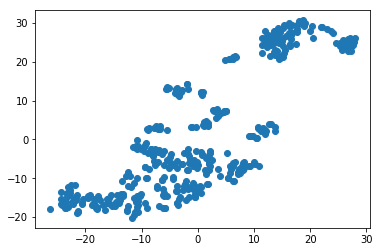

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

In [24]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [45]:
labels_train = kmeans.fit_predict(X_train_scaled)

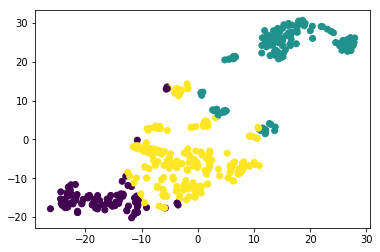

In [46]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [47]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534884
Кластер 1: 10.797028425196851
Кластер 2: 0.4216602094240837


In [48]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'Price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'Price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'Price'].mean()))

Кластер 0: 27.78837209302326
Кластер 1: 16.165354330708663
Кластер 2: 24.958115183246072


### Задание 3

In [49]:
labels_test = kmeans.predict(X_test_scaled)

Понизил размерность на тестовой выборке, чтобы посмотреть к каким классам были отнесены данные из нее

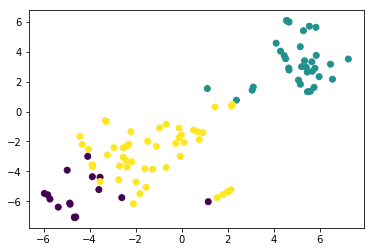

In [50]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [52]:
print('Кластер 0: {}'.format(X_test_scaled.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test_scaled.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test_scaled.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: -0.4001621889856215
Кластер 1: 0.7396611726050217
Кластер 2: -0.3771458000659119


In [53]:
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'Price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'Price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'Price'].mean()))

Кластер 0: 31.35
Кластер 1: 16.43714285714286
Кластер 2: 21.860784313725492
